In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error

%matplotlib inline

# Etot VS a

In [56]:
Etot_1 = pd.read_table("../DM_high_P/Etot", delimiter=" ", header=None)
Etot_high_P = pd.DataFrame({'a' : [i/10 for i in range(30,41,1)], 'Etot (Ry)' : Etot_1[24].to_list(), 'Etot (eV/atom)' : [i*13.606/2 for i in Etot_1[24].to_list()]})
Etot_high_P

,a,Etot (Ry),Etot (eV/atom)
0,3.0,-36.453645,-247.994147
1,3.1,-36.608131,-249.045114
2,3.2,-36.719033,-249.799585
3,3.3,-36.794351,-250.311972
4,3.4,-36.840702,-250.627294
5,3.5,-36.863563,-250.782820
6,3.6,-36.867503,-250.809621
7,3.7,-36.856337,-250.733662
8,3.8,-36.833281,-250.576814
9,3.9,-36.801017,-250.357316


(-251.0, -247.5)

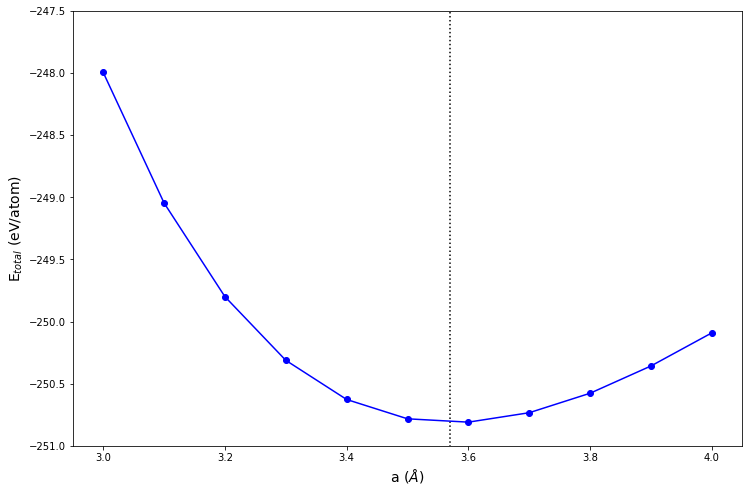

In [57]:
fig = plt.figure(figsize=(12,8))

plt.plot(Etot_high_P['a'],Etot_high_P["Etot (eV/atom)"],"bo-")
plt.xlabel('a ($\AA$)',size=14)
plt.ylabel('E$_{total}$ (eV/atom)',size=14)
plt.vlines(3.57,-252,-247,color='k',linestyles=':')

plt.ylim(-251,-247.5)

# Etot VS Volume

In [58]:
Etot_high_P.insert(1, "V (A^3/atom)", np.power((Etot_high_P["a"]*np.sqrt(2)),3)/4, True)
Etot_high_P

,a,V (A^3/atom),Etot (Ry),Etot (eV/atom)
0,3.0,19.091883,-36.453645,-247.994147
1,3.1,21.065418,-36.608131,-249.045114
2,3.2,23.170475,-36.719033,-249.799585
3,3.3,25.411296,-36.794351,-250.311972
4,3.4,27.792125,-36.840702,-250.627294
5,3.5,30.317203,-36.863563,-250.782820
6,3.6,32.990774,-36.867503,-250.809621
7,3.7,35.817080,-36.856337,-250.733662
8,3.8,38.800363,-36.833281,-250.576814
9,3.9,41.944867,-36.801017,-250.357316


(-251.0, -247.5)

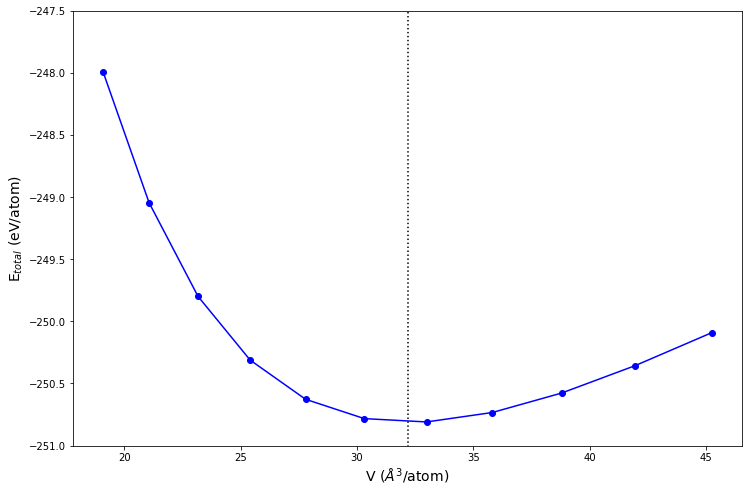

In [59]:
fig = plt.figure(figsize=(12,8))

plt.plot(Etot_high_P['V (A^3/atom)'],Etot_high_P["Etot (eV/atom)"],"bo-")
plt.xlabel('V ($\AA^3$/atom)',size=14)
plt.ylabel('E$_{total}$ (eV/atom)',size=14)
plt.vlines(np.power((3.57*np.sqrt(2)),3)/4,-252,-247,color='k',linestyles=':')

plt.ylim(-251,-247.5)

In [60]:
poly = np.poly1d(np.polyfit(Etot_high_P['V (A^3/atom)'], Etot_high_P["Etot (eV/atom)"], 5))
poly_line = np.linspace(15, 50, 100)
print(poly)
print('R2: ',r2_score(Etot_high_P["Etot (eV/atom)"], poly(Etot_high_P['V (A^3/atom)'])))
print('MAE: ',mean_absolute_error(Etot_high_P["Etot (eV/atom)"], poly(Etot_high_P['V (A^3/atom)']))*1000,'meV/atom')

            5             4            3          2
-6.613e-07 x + 0.0001247 x - 0.009542 x + 0.3742 x - 7.512 x - 189.4
R2:  0.9999908018538877
MAE:  2.248432575188727 meV/atom


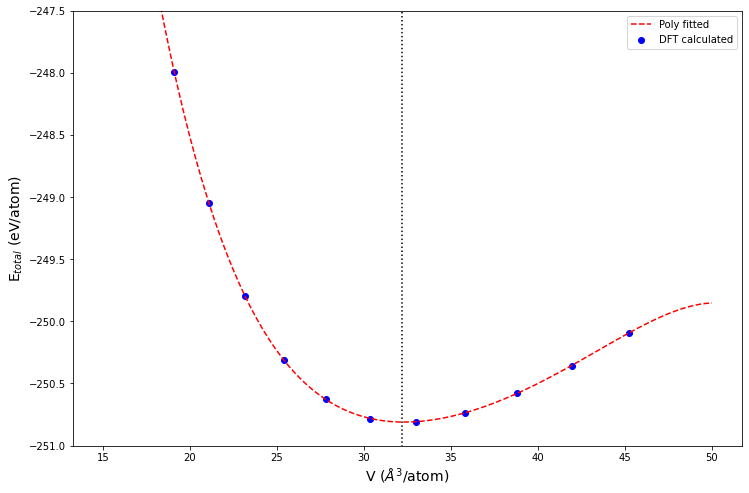

In [61]:
fig = plt.figure(figsize=(12,8))

plt.scatter(Etot_high_P['V (A^3/atom)'],Etot_high_P["Etot (eV/atom)"],color='b',label='DFT calculated')
plt.plot(poly_line,poly(poly_line),'r--',label='Poly fitted')
plt.xlabel('V ($\AA^3$/atom)',size=14)
plt.ylabel('E$_{total}$ (eV/atom)',size=14)
plt.vlines(np.power((3.57*np.sqrt(2)),3)/4,-252,-247,color='k',linestyles=':')

plt.ylim(-251,-247.5)
plt.legend()

# Etot VS Pressure

In [62]:
deriv_poly = [poly[i] * i for i in range(1, len(poly)+1)]
print(deriv_poly)

[-7.512363751499373, 0.7484066821356368, -0.028626505970527176, 0.0004986560038205569, -3.3067394270175256e-06]


In [63]:
def P_from_deriv_poly_eq(deriv_poly,V):
    return -(deriv_poly[0]+deriv_poly[1]*V+deriv_poly[2]*np.power(V,2)+deriv_poly[3]*np.power(V,3)+deriv_poly[4]*np.power(V,4))*1.602*np.power(10,2)

In [64]:
Etot_high_P.insert(4, "P (GPa)", P_from_deriv_poly_eq(deriv_poly,Etot_high_P["V (A^3/atom)"]), True)
Etot_high_P

,a,V (A^3/atom),Etot (Ry),Etot (eV/atom),P (GPa)
0,3.0,19.091883,-36.453645,-247.994147,100.513275
1,3.1,21.065418,-36.608131,-249.045114,70.445079
2,3.2,23.170475,-36.719033,-249.799585,46.491359
3,3.3,25.411296,-36.794351,-250.311972,28.177772
4,3.4,27.792125,-36.840702,-250.627294,14.746063
5,3.5,30.317203,-36.863563,-250.782820,5.216218
6,3.6,32.990774,-36.867503,-250.809621,-1.496653
7,3.7,35.817080,-36.856337,-250.733662,-6.393992
8,3.8,38.800363,-36.833281,-250.576814,-10.114212
9,3.9,41.944867,-36.801017,-250.357316,-12.538337


(-251.0, -247.5)

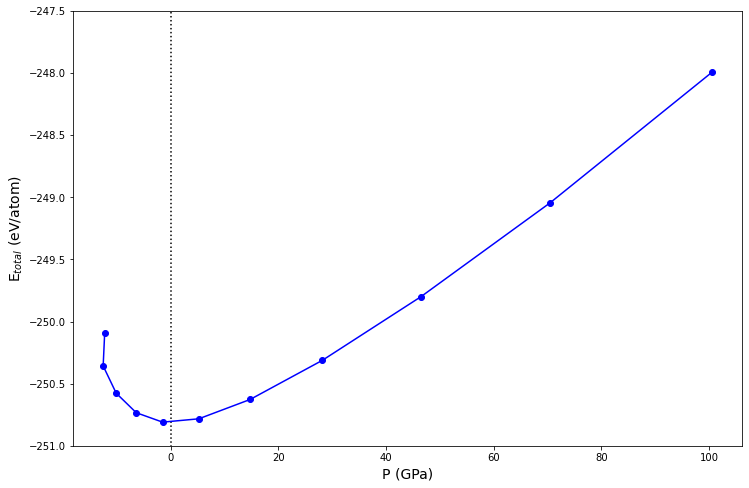

In [75]:
fig = plt.figure(figsize=(12,8))

plt.plot(Etot_high_P['P (GPa)'],Etot_high_P["Etot (eV/atom)"],'bo-')
plt.xlabel('P (GPa)',size=14)
plt.ylabel('E$_{total}$ (eV/atom)',size=14)
plt.vlines(0,-252,-247,color='k',linestyles=':')

plt.ylim(-251,-247.5)

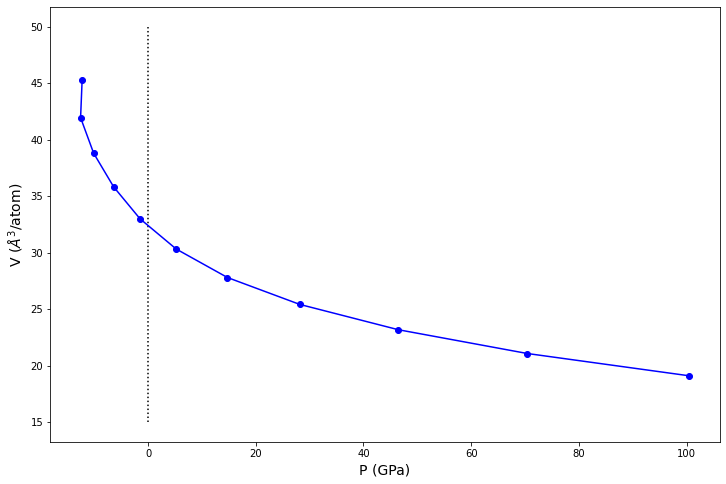

In [85]:
fig = plt.figure(figsize=(12,8))

plt.plot(P_from_deriv_poly_eq(deriv_poly,Etot_high_P["V (A^3/atom)"]),Etot_high_P["V (A^3/atom)"],'bo-')
plt.xlabel('P (GPa)',size=14)
plt.ylabel('V ($\AA^3$/atom)',size=14)
plt.vlines(0,15,50,color='k',linestyles=':')

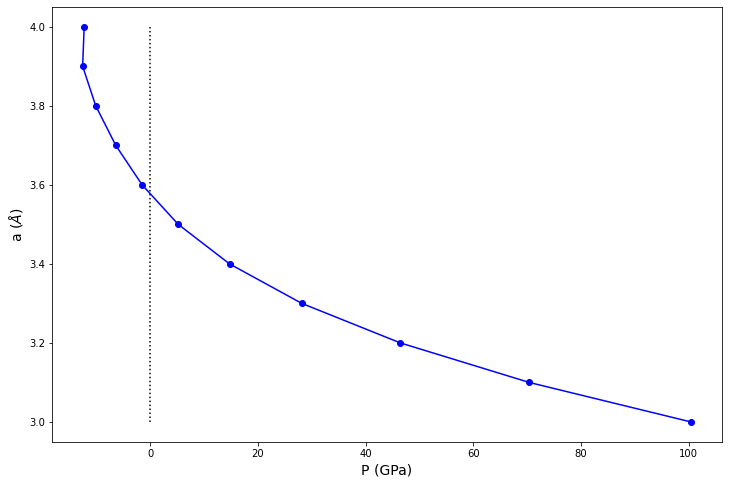

In [87]:
fig = plt.figure(figsize=(12,8))

plt.plot(P_from_deriv_poly_eq(deriv_poly,Etot_high_P["V (A^3/atom)"]),Etot_high_P["a"],'bo-')
plt.xlabel('P (GPa)',size=14)
plt.ylabel('a ($\AA$)',size=14)
plt.vlines(0,3,4,color='k',linestyles=':')